In [15]:
import cirq
import numpy as np

In [16]:
def H_p(C, gamma, N):
    HCircuit = cirq.Circuit()
    qubits = cirq.LineQubit.range(N)
    for i in range(0, N, 1):
        for j in range(i+1, N, 1):
            HCircuit.append(cirq.CNOT(qubits[i], qubits[j]))
            HCircuit.append(cirq.rz(gamma * C[i][j])(cirq.LineQubit(j)))
            HCircuit.append(cirq.CNOT(qubits[i], qubits[j]))
    return HCircuit

def H_d(N, beta):
    dCircuit = cirq.Circuit()
    qubits = cirq.LineQubit.range(N)
    for i in range(N):
        dCircuit.append(cirq.rx(beta)(cirq.LineQubit(i)))
    return dCircuit

def H_pZZ(C, gamma, N):
    HCircuit = cirq.Circuit()
    qubits = cirq.LineQubit.range(N)
    for i in range(0, N, 1):
        for j in range(i+1, N, 1):
            HCircuit.append(cirq.ZZ(qubits[i], qubits[j]) ** (gamma*C[i][j]))
    return HCircuit

In [ ]:
def singleGateError(circuit, qubit):
    if np.random.random() < 0.0005:
        gate = np.random.choice(range(3))
        if gate == 0:
            circuit.append(cirq.X(qubit))
        if gate == 1:
            circuit.append(cirq.Y(qubit))
        if gate == 2:
            circuit.append(cirq.Z(qubit))
def CNOTError(circuit, qubit):
    if np.random.random() < 0.05:
        gate = np.random.choice(range(3))
        if gate == 0:
            circuit.append(cirq.X(qubit))
        if gate == 1:
            circuit.append(cirq.Y(qubit))
        if gate == 2:
            circuit.append(cirq.Z(qubit))

In [17]:
def f(x):
    return 1 - (1-x)**2

/home/dumpster-jedi/.local/lib/python3.10/site-packages/cirq/vis/state_histogram.py:103: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

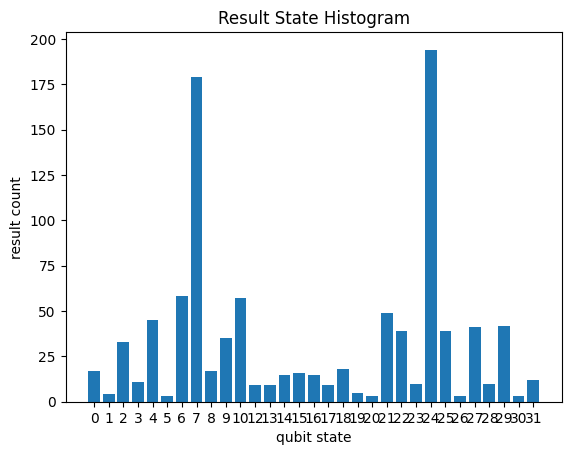

In [18]:
#################################TEST#############################################
costMat = [[0, .12, .05, .83, .76],
           [0, 0, .09, .95, .69],
           [0, 0, 0, .98, .87],
           [0, 0, 0, 0, .12],
           [0, 0, 0, 0, 0],]
costMat = np.array(costMat)
for i in range(len(costMat)):
    for j in range(len(costMat)):
        costMat[i][j] = costMat[i][j] * 100

N = 5

testCircuit = cirq.Circuit()
testQubits = cirq.LineQubit.range(N)

testCircuit.append(cirq.H.on_each(*testQubits))

T = 1.0
dt = .2

for t in np.arange(0, T, dt):
    pAngle = (-2 * f(t/T) * dt)
    dAngle = (-2 * (1-f(t/T) * dt))
    testCircuit.append(H_pZZ(costMat, pAngle, N))
    testCircuit.append(H_d(N, dAngle))

testCircuit.append(cirq.measure(*testQubits, key='z'))



counts = 1000

simulator = cirq.Simulator()
samples =  simulator.run(testCircuit, repetitions=counts)

data = samples.histogram(key='z')
cirq.plot_state_histogram(data)

##################################TEST############################################
#correct answer should be 7 or 24
